In [1]:
cd ..

c:\Users\Serkan\Desktop\projeler\yed_teknoloji


In [2]:
import scipy.io,pandas as pd, datetime, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mat = scipy.io.loadmat(r"data\B0005.mat")

In [3]:
data = {"cycle_id": [], "type": [], "ambient_temperature": [], "date_time": [], "voltage_measured": [], "current_measured": [], "temperature_measured": [], "current_charge": [], "voltage_charge": [], "time": [], "capacity": []}

mat["B0005"]["cycle"][0][0][0][0]

np.void((array(['charge'], dtype='<U6'), array([[24]], dtype=uint8), array([[2.0080e+03, 4.0000e+00, 2.0000e+00, 1.3000e+01, 8.0000e+00,
        1.7921e+01]]), array([[(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
                4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
                4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
                4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
                4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
                4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
                4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
                4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
                4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
                4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
                4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
   

In [4]:
len(mat["B0005"][0, 0]['cycle'][0])

616

In [5]:
idx = 0
for i in range(len(mat["B0005"][0, 0]['cycle'][0])):
    row = mat["B0005"][0, 0]['cycle'][0, i]
    d = row["data"]

    cycle_type = row['type'][0]
    ambient_temp = row['ambient_temperature'][0][0] if row['ambient_temperature'].size else None
    date_time = datetime.datetime(int(row['time'][0][0]),
                        int(row['time'][0][1]),
                        int(row['time'][0][2]),
                        int(row['time'][0][3]),
                        int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))

    if cycle_type == 'discharge':
        idx += 1
        n = len(d[0][0]['Voltage_measured'][0])

        for j in range(n):
            data['cycle_id'].append(idx)
            data['type'].append(cycle_type)
            data['ambient_temperature'].append(ambient_temp)
            data['date_time'].append(date_time)

            data['voltage_measured'].append(d[0][0]['Voltage_measured'][0][j])
            data['current_measured'].append(d[0][0]['Current_measured'][0][j])
            data['temperature_measured'].append(d[0][0]['Temperature_measured'][0][j])

            try:
                data['current_charge'].append(d[0][0]['Current_charge'][0][j])
            except ValueError:
                data['current_charge'].append(d[0][0]['Current_load'][0][j])

            try:
                data['voltage_charge'].append(d[0][0]['Voltage_charge'][0][j])
            except ValueError:
                data['voltage_charge'].append(d[0][0]['Voltage_load'][0][j])

            data['time'].append(d[0][0]['Time'][0][j])

            if cycle_type == 'charge':
                data['capacity'].append(None)
            else:
                try:
                    data['capacity'].append(d[0][0]['Capacity'][0][0])
                except:
                    data['capacity'].append(None)


In [6]:
df = pd.DataFrame(data)
df

,cycle_id,type,ambient_temperature,date_time,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge,time,capacity
0,1,discharge,24,2008-04-02 15:25:41,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487
1,1,discharge,24,2008-04-02 15:25:41,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487
2,1,discharge,24,2008-04-02 15:25:41,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487
3,1,discharge,24,2008-04-02 15:25:41,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487
4,1,discharge,24,2008-04-02 15:25:41,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487
...,...,...,...,...,...,...,...,...,...,...,...
50280,168,discharge,24,2008-05-27 20:45:42,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.325079
50281,168,discharge,24,2008-05-27 20:45:42,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.325079
50282,168,discharge,24,2008-05-27 20:45:42,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.325079
50283,168,discharge,24,2008-05-27 20:45:42,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.325079


In [7]:
df['type'].value_counts()

type
discharge    50285
Name: count, dtype: int64

In [8]:
df["dt_s"] = (
    df.groupby("cycle_id")["time"]
      .diff()
      .clip(lower=0)
      .fillna(0)
)

df["dQ_Ah"] = (-df["current_measured"]) * df["dt_s"] / 3600.0

df["Q_cum_Ah"] = df.groupby("cycle_id")["dQ_Ah"].cumsum().fillna(0.0)

df["soc_percent"] = 100 * (1.0 - df["Q_cum_Ah"] / df["capacity"])

df["soc_percent"] = df["soc_percent"].clip(0, 100)

df.loc[:, ["cycle_id","time","Q_cum_Ah","capacity","soc_percent"]]


,cycle_id,time,Q_cum_Ah,capacity,soc_percent
0,1,0.000,0.000000,1.856487,100.000000
1,1,16.781,0.000007,1.856487,99.999629
2,1,35.703,0.010585,1.856487,99.429839
3,1,53.781,0.020698,1.856487,98.885072
4,1,71.922,0.030833,1.856487,98.339176
...,...,...,...,...,...
50280,168,2781.312,1.328030,1.325079,0.000000
50281,168,2791.062,1.328039,1.325079,0.000000
50282,168,2800.828,1.328047,1.325079,0.000000
50283,168,2810.640,1.328044,1.325079,0.000000


In [9]:
import numpy as np

df["dV_dt"] = df.groupby("cycle_id")["voltage_measured"].diff() / df["dt_s"]
df["dV_dt"] = df["dV_dt"].replace([np.inf, -np.inf], 0).fillna(0)

print(df.loc[:, [
    "cycle_id", "time", 
    "voltage_measured", "current_measured",
    "dV_dt"
]].head(20))

    cycle_id     time  voltage_measured  current_measured     dV_dt
0          1    0.000          4.191492         -0.004902  0.000000
1          1   16.781          4.190749         -0.001478 -0.000044
2          1   35.703          3.974871         -2.012528 -0.011409
3          1   53.781          3.951717         -2.013979 -0.001281
4          1   71.922          3.934352         -2.011144 -0.000957
5          1   90.094          3.920058         -2.013007 -0.000787
6          1  108.281          3.907904         -2.014400 -0.000668
7          1  126.453          3.897036         -2.011603 -0.000598
8          1  144.641          3.887477         -2.018015 -0.000526
9          1  162.844          3.878959         -2.013135 -0.000468
10         1  181.016          3.871016         -2.013162 -0.000437
11         1  199.219          3.863480         -2.013030 -0.000414
12         1  217.391          3.856661         -2.013710 -0.000375
13         1  235.594          3.850014         

In [10]:
df.tail(60)

,cycle_id,type,ambient_temperature,date_time,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge,time,capacity,dt_s,dQ_Ah,Q_cum_Ah,soc_percent,dV_dt
50225,168,discharge,24,2008-05-27 20:45:42,3.051099,-2.011807,39.234341,1.9982,2.095,2250.484,1.325079,9.563,5.344143e-03,1.253285,5.418080,-0.001494
50226,168,discharge,24,2008-05-27 20:45:42,3.036630,-2.014253,39.422497,1.9982,2.080,2259.984,1.325079,9.500,5.315390e-03,1.258601,5.016942,-0.001523
50227,168,discharge,24,2008-05-27 20:45:42,3.021300,-2.012612,39.499299,1.9982,2.065,2269.546,1.325079,9.562,5.345722e-03,1.263947,4.613516,-0.001603
50228,168,discharge,24,2008-05-27 20:45:42,3.005268,-2.011656,39.645069,1.9982,2.050,2279.140,1.325079,9.594,5.361064e-03,1.269308,4.208931,-0.001671
50229,168,discharge,24,2008-05-27 20:45:42,2.989018,-2.015098,39.619614,1.9982,2.034,2288.687,1.325079,9.547,5.343929e-03,1.274652,3.805640,-0.001702
50230,168,discharge,24,2008-05-27 20:45:42,2.971736,-2.013231,39.806227,1.9982,2.017,2298.218,1.325079,9.531,5.330028e-03,1.279982,3.403398,-0.001813
50231,168,discharge,24,2008-05-27 20:45:42,2.953434,-2.014594,39.829665,1.9980,2.000,2307.781,1.325079,9.563,5.351546e-03,1.285333,2.999532,-0.001914
50232,168,discharge,24,2008-05-27 20:45:42,2.933381,-2.014272,39.902501,1.9982,1.982,2317.328,1.325079,9.547,5.341738e-03,1.290675,2.596406,-0.002100
50233,168,discharge,24,2008-05-27 20:45:42,2.910892,-2.012625,40.173062,1.9982,1.960,2326.859,1.325079,9.531,5.328425e-03,1.296003,2.194285,-0.002360
50234,168,discharge,24,2008-05-27 20:45:42,2.885104,-2.012593,40.226338,1.9982,1.937,2336.390,1.325079,9.531,5.328339e-03,1.301332,1.792170,-0.002706


In [11]:
print(df.info())
print("*"*50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cycle_id              50285 non-null  int64         
 1   type                  50285 non-null  object        
 2   ambient_temperature   50285 non-null  uint8         
 3   date_time             50285 non-null  datetime64[ns]
 4   voltage_measured      50285 non-null  float64       
 5   current_measured      50285 non-null  float64       
 6   temperature_measured  50285 non-null  float64       
 7   current_charge        50285 non-null  float64       
 8   voltage_charge        50285 non-null  float64       
 9   time                  50285 non-null  float64       
 10  capacity              50285 non-null  float64       
 11  dt_s                  50285 non-null  float64       
 12  dQ_Ah                 50285 non-null  float64       
 13  Q_cum_Ah        

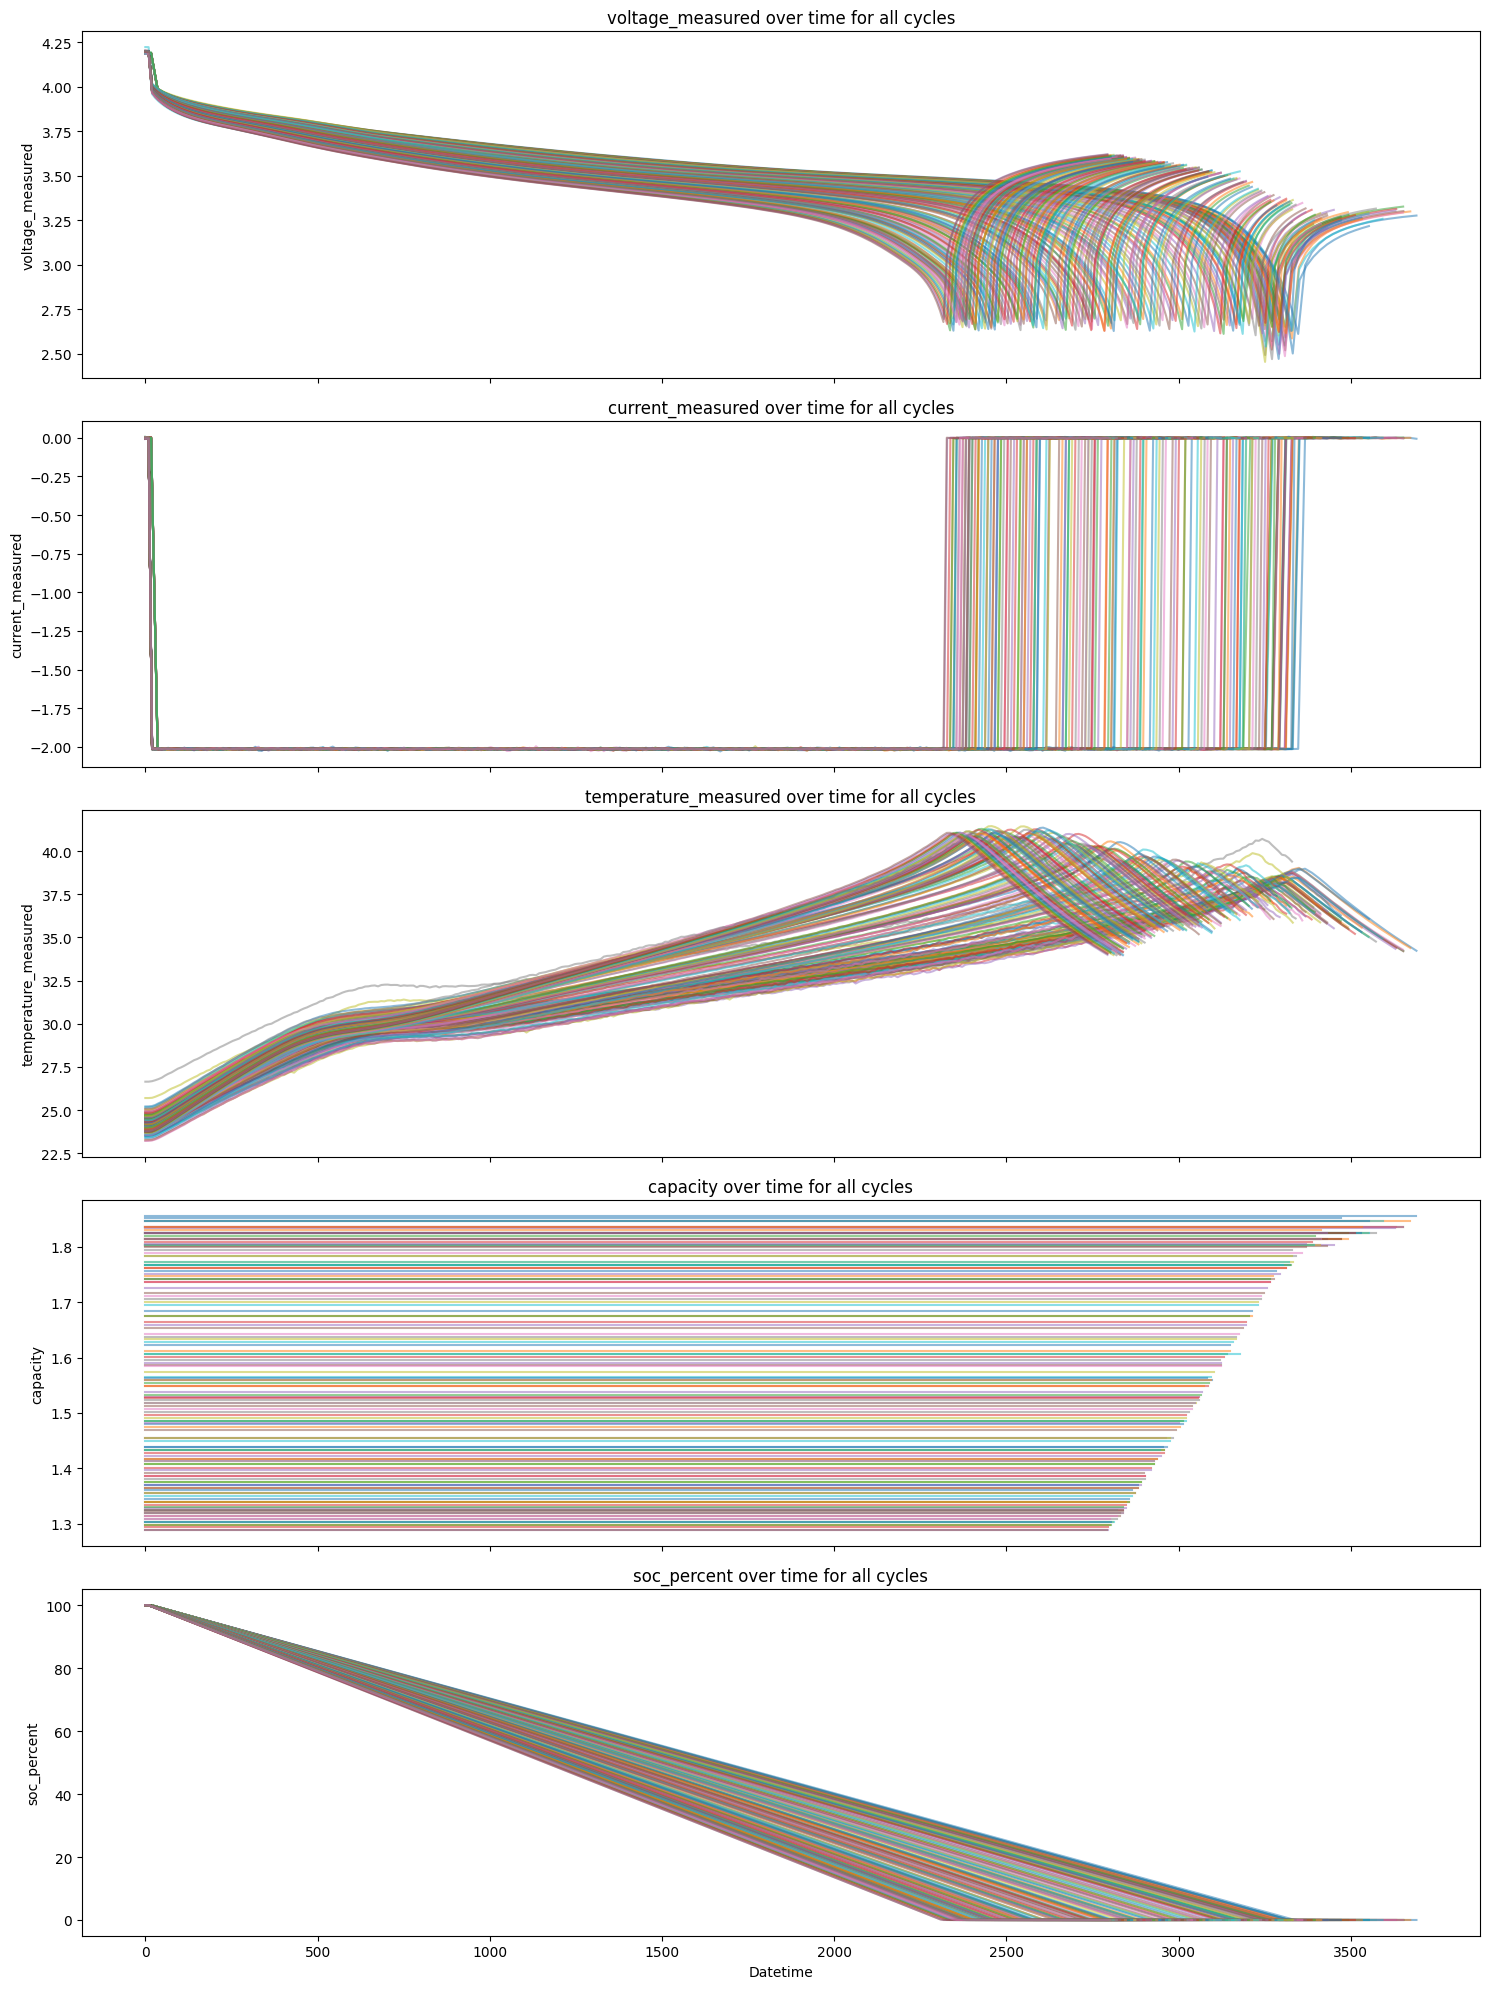

In [12]:
variables = ['voltage_measured', 'current_measured', 'temperature_measured', 'capacity', 'soc_percent']
fig, axes = plt.subplots(len(variables), 1, figsize=(15, 20), sharex=True)

for i, var in enumerate(variables):
    ax = axes[i]
    for cycle in df['cycle_id'].unique():
        df_cycle = df[df['cycle_id'] == cycle]
        ax.plot(df_cycle['time'], df_cycle[var], alpha=0.5)
    ax.set_ylabel(var)
    ax.set_title(f"{var} over time for all cycles")

axes[-1].set_xlabel("Datetime")
plt.tight_layout()
plt.show()


C:\Users\Serkan\AppData\Local\Temp\ipykernel_10004\1151219192.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['time'] = pd.to_datetime(df['time']).view('int64') / 10**9
C:\Users\Serkan\AppData\Local\Temp\ipykernel_10004\1151219192.py:7: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['dt_s'] = pd.to_datetime(df['dt_s']).view('int64') / 10**9


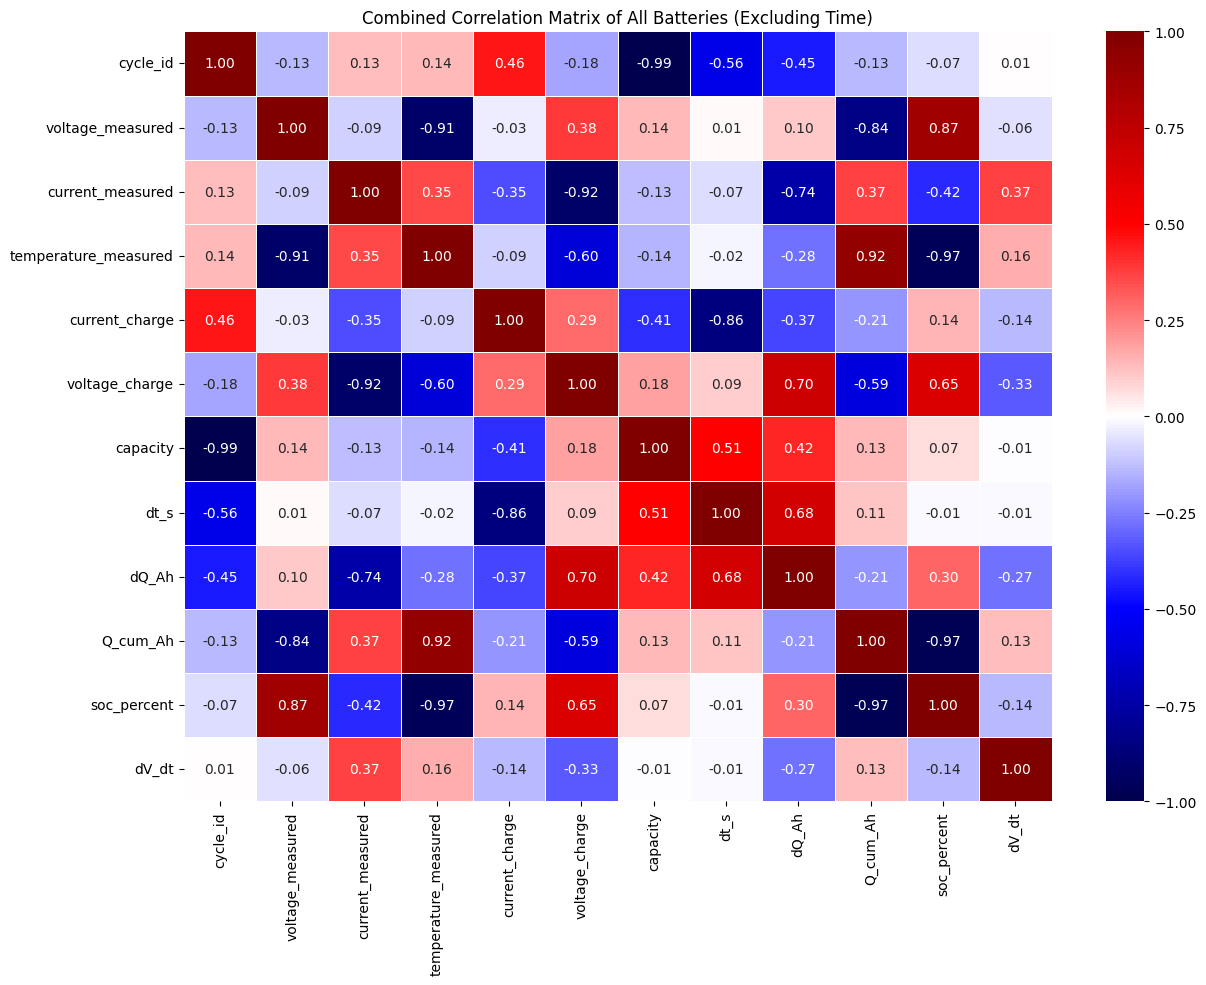

In [13]:
common_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'time']

if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time']).view('int64') / 10**9

if 'dt_s' in df.columns:
    df['dt_s'] = pd.to_datetime(df['dt_s']).view('int64') / 10**9


combined_df = df[common_columns]

correlation_matrix = combined_df.corr()
with open("correlation_matrix.txt", "w") as f:
    f.write(correlation_matrix.to_string())
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', center=0, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Combined Correlation Matrix of All Batteries (Excluding Time)')
plt.show()

In [14]:
class LSTM_SOC(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.2):
        super(LSTM_SOC, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out


class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.2):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, h_n = self.gru(x)
        last_h = h_n[-1]
        out = self.fc(last_h)
        return out
    
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_size, nhead=4, num_layers=2, dim_feedforward=64, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.input_fc = nn.Linear(input_size, dim_feedforward)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=dim_feedforward,
            nhead=nhead,
            dim_feedforward=dim_feedforward*2,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(dim_feedforward, 1)

    def forward(self, x):
        x = self.input_fc(x)
        out = self.transformer(x)
        out = out[:, -1, :]
        out = self.fc_out(out)
        return out

In [15]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=1e-5, verbose=False):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss + self.min_delta < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

In [16]:
class BatteryDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [17]:
def prepare_data_with_val(df, feature_cols, target_col, seq_length=50, train_ratio=0.7, val_ratio=0.1):
    scaler_X = MinMaxScaler()
    X_all = df[feature_cols].values
    X_scaled = scaler_X.fit_transform(X_all)

    scaler_y = MinMaxScaler()
    y_all = df[[target_col]].values
    y_scaled = scaler_y.fit_transform(y_all)

    df_scaled = df.copy()
    df_scaled[feature_cols] = X_scaled
    df_scaled[target_col] = y_scaled

    X_seq, y_seq, cycle_ids = [], [], []
    for cycle in df_scaled['cycle_id'].unique():
        df_cycle = df_scaled[df_scaled['cycle_id'] == cycle]
        for i in range(len(df_cycle) - seq_length):
            X_seq.append(df_cycle[feature_cols].iloc[i:i+seq_length].values)
            y_seq.append(df_cycle[target_col].iloc[i+seq_length-1])
            cycle_ids.append(cycle)
    
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq).reshape(-1, 1)
    cycle_ids = np.array(cycle_ids)

    unique_cycles = df_scaled['cycle_id'].unique()
    n_train = int(len(unique_cycles) * train_ratio)
    n_val = int(len(unique_cycles) * val_ratio)

    train_cycles = unique_cycles[:n_train]
    val_cycles = unique_cycles[n_train:n_train+n_val]
    test_cycles = unique_cycles[n_train+n_val:]

    train_mask = np.isin(cycle_ids, train_cycles)
    val_mask = np.isin(cycle_ids, val_cycles)
    test_mask = np.isin(cycle_ids, test_cycles)

    X_train, y_train = X_seq[train_mask], y_seq[train_mask]
    X_val, y_val = X_seq[val_mask], y_seq[val_mask]
    X_test, y_test = X_seq[test_mask], y_seq[test_mask]

    return X_train, X_val, X_test, y_train, y_val, y_test, scaler_X, scaler_y


In [18]:
def train_and_evaluate(model, train_loader, val_loader, test_loader, scaler_y, num_epochs=50, lr=1e-3, patience=5):
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    history = {"train_loss": [], "val_loss": [], "val_mae": []}

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * X_batch.size(0)
        epoch_loss /= len(train_loader.dataset)

        model.eval()
        val_loss = 0
        val_preds, val_trues = [], []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                y_pred_val = model(X_val)
                val_loss += criterion(y_pred_val, y_val).item() * X_val.size(0)
                val_preds.append(y_pred_val.cpu().numpy())
                val_trues.append(y_val.numpy())
        val_loss /= len(val_loader.dataset)
        val_preds = np.vstack(val_preds)
        val_trues = np.vstack(val_trues)
        val_preds = scaler_y.inverse_transform(val_preds)
        val_trues = scaler_y.inverse_transform(val_trues)
        val_mae = mean_absolute_error(val_trues, val_preds)

        history["train_loss"].append(epoch_loss)
        history["val_loss"].append(val_loss)
        history["val_mae"].append(val_mae)

        print(f"{model.__class__.__name__} Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.6f}, Val Loss: {val_loss:.6f}, Val MAE: {val_mae:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered!")
            break

    model.eval()
    y_pred_list, y_true_list = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            y_pred_list.append(y_pred.cpu().numpy())
            y_true_list.append(y_batch.numpy())

    y_pred_all = np.vstack(y_pred_list)
    y_true_all = np.vstack(y_true_list)
    y_pred_all = scaler_y.inverse_transform(y_pred_all)
    y_true_all = scaler_y.inverse_transform(y_true_all)

    mae = mean_absolute_error(y_true_all, y_pred_all)
    rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    epsilon = 1e-3
    mape = np.mean(np.abs((y_true_all - y_pred_all) / (y_true_all + epsilon))) * 100

    r2 = r2_score(y_true_all, y_pred_all)

    metrics = {"MAE": mae, "RMSE": rmse, "MAPE": mape, "R2": r2}

    return metrics, history



Training LSTM...
LSTM_SOC Epoch 1/50, Train Loss: 0.015030, Val Loss: 0.000348, Val MAE: 1.5359
LSTM_SOC Epoch 2/50, Train Loss: 0.003203, Val Loss: 0.000535, Val MAE: 1.8450
EarlyStopping counter: 1 out of 3
LSTM_SOC Epoch 3/50, Train Loss: 0.002510, Val Loss: 0.000078, Val MAE: 0.7617
LSTM_SOC Epoch 4/50, Train Loss: 0.002036, Val Loss: 0.000162, Val MAE: 1.0722
EarlyStopping counter: 1 out of 3
LSTM_SOC Epoch 5/50, Train Loss: 0.001754, Val Loss: 0.000081, Val MAE: 0.7254
EarlyStopping counter: 2 out of 3
LSTM_SOC Epoch 6/50, Train Loss: 0.001602, Val Loss: 0.000234, Val MAE: 1.3084
EarlyStopping counter: 3 out of 3
Early stopping triggered!

Training GRU...
GRUModel Epoch 1/50, Train Loss: 0.008929, Val Loss: 0.000254, Val MAE: 1.3044
GRUModel Epoch 2/50, Train Loss: 0.000353, Val Loss: 0.000113, Val MAE: 0.8729
GRUModel Epoch 3/50, Train Loss: 0.000282, Val Loss: 0.000164, Val MAE: 1.1108
EarlyStopping counter: 1 out of 3
GRUModel Epoch 4/50, Train Loss: 0.000233, Val Loss: 0.000

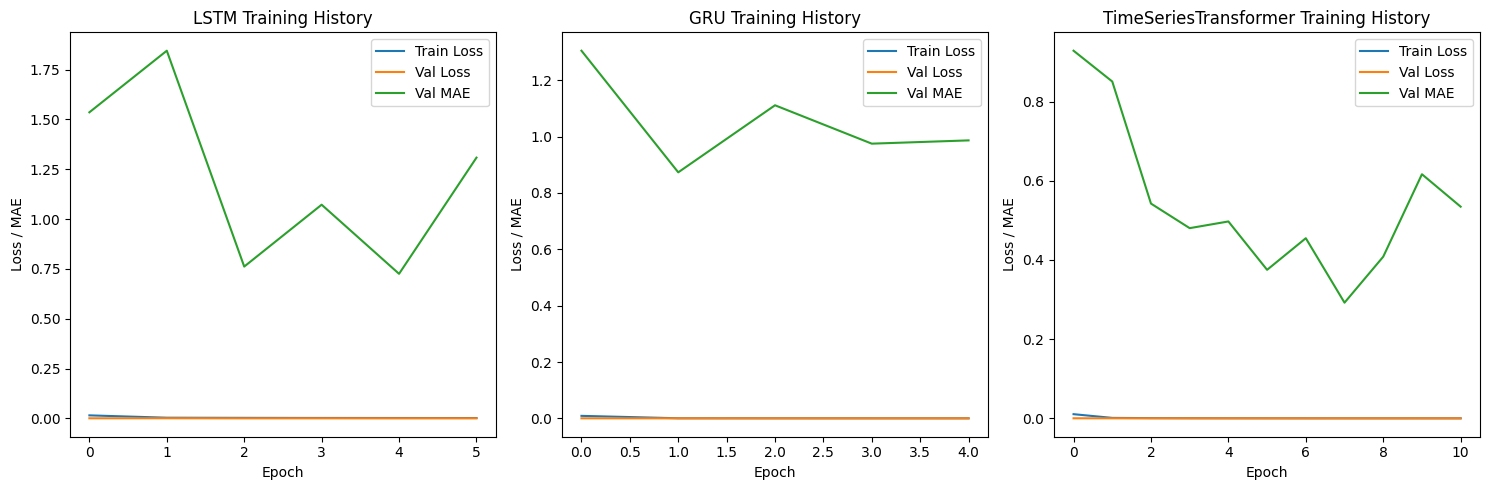

In [19]:
feature_cols = ['voltage_measured', 'current_measured', 'temperature_measured', 'Q_cum_Ah', 'capacity', 'dV_dt']
target_col = 'soc_percent'

X_train, X_val, X_test, y_train, y_val, y_test, scaler_X, scaler_y = prepare_data_with_val(
    combined_df, feature_cols, target_col, seq_length=40, train_ratio=0.7, val_ratio=0.1
)

train_dataset = BatteryDataset(X_train, y_train)
val_dataset = BatteryDataset(X_val, y_val)
test_dataset = BatteryDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

models = {
    "LSTM": LSTM_SOC(input_size=len(feature_cols), hidden_size=32, num_layers=2, dropout=0.4),
    "GRU": GRUModel(input_size=len(feature_cols), hidden_size=32, num_layers=2, dropout=0.4),
    "TimeSeriesTransformer": TimeSeriesTransformer(
        input_size=len(feature_cols), 
        nhead=4, 
        num_layers=2, 
        dim_feedforward=32, 
        dropout=0.4
    )
}

results = {}
histories = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    metrics, history = train_and_evaluate(
        model, 
        train_loader, 
        val_loader, 
        test_loader, 
        scaler_y,
        num_epochs=50, 
        lr=1e-3, 
        patience=3
    )
    results[name] = metrics
    histories[name] = history

df_results = pd.DataFrame(results).T
print("\n=== Model Karşılaştırması ===")
print(df_results)

plt.figure(figsize=(15, 5))
for i, (name, history) in enumerate(histories.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.plot(history['val_mae'], label='Val MAE')
    plt.title(f"{name} Training History")
    plt.xlabel('Epoch')
    plt.ylabel('Loss / MAE')
    plt.legend()
plt.tight_layout()
plt.show()

In [20]:
for name, model in models.items():
    torch.save(model.state_dict(), f"models/{name}_model.pth")
    print(f"{name} state_dict saved.")

LSTM state_dict saved.
GRU state_dict saved.
TimeSeriesTransformer state_dict saved.


In [ ]:
import pickle

with open("models/scaler_X.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

with open("models/scaler_y.pkl", "wb") as f:
    pickle.dump(scaler_y, f)